## 1. A Simple implementation of ANN for MNIST

![](elephant.jpg)

In [53]:
import random
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model # both used for defining  the networks
from keras.layers.core import Dense, Dropout, Activation # defining the layers
from keras.optimizers import RMSprop, SGD
from keras.utils import np_utils
from keras import backend as K
# IMAGE ORDERING: Tensorflow(64,64,3), Theano(3,64,64)
K.set_image_dim_ordering('tf') # always check you are using the correct image dimension
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preprocessing 

In [36]:
# load the mnist datasets (auto or pre dowloaded in ./keras)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# ptint the data shape
print(X_train.shape, y_train.shape)
print(X_train.shape, y_test.shape)

(60000, 28, 28) (60000,)
(60000, 28, 28) (10000,)


In [14]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255
X_test /=255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples') 

60000 train samples
10000 test samples


In [16]:
batch_size = 128
nb_classes = 10
nb_epoch = 10
# convert class vectors to binary class matrices for softmax layer
Y_train  = keras.utils.np_utils.to_categorical(y_train, nb_classes)
Y_test   = keras.utils.np_utils.to_categorical(y_test, nb_classes)
# for example the one-hot encoding for number 6 is [0,0,0,0,0,0,1,0,0,0,0]
print(Y_train.shape)

(60000, 10)


### Model definition 

In [18]:
model = Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
__________

### Model compilation

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',#RMSprop()
              metrics=['accuracy'])

In [28]:
history = model.fit(X_train,Y_train,
                    batch_size = batch_size,epochs=nb_epoch,
                    verbose=1,validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s - loss: 0.0340 - acc: 0.9893 - val_loss: 0.0803 - val_acc: 0.9803
Epoch 2/10
60000/60000 [==============================] - 1s - loss: 0.0336 - acc: 0.9898 - val_loss: 0.0729 - val_acc: 0.9808
Epoch 3/10
60000/60000 [==============================] - 1s - loss: 0.0320 - acc: 0.9903 - val_loss: 0.0731 - val_acc: 0.9827
Epoch 4/10
60000/60000 [==============================] - 1s - loss: 0.0307 - acc: 0.9905 - val_loss: 0.0668 - val_acc: 0.9816
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 0.0301 - acc: 0.9909 - val_loss: 0.0705 - val_acc: 0.9819
Epoch 6/10
60000/60000 [==============================] - 1s - loss: 0.0287 - acc: 0.9910 - val_loss: 0.0881 - val_acc: 0.9813
Epoch 7/10
60000/60000 [==============================] - 1s - loss: 0.0275 - acc: 0.9915 - val_loss: 0.0765 - val_acc: 0.9813
Epoch 8/10
60000/60000 [==============================] - 1s 

In [29]:
history.params # very useful in paper

{'batch_size': 128,
 'do_validation': True,
 'epochs': 10,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 60000,
 'verbose': 1}

In [31]:
history.history # a dictionary in python:loss-acc-val_acc-val_loss

{'acc': [0.98933333339691165,
  0.98983333333333334,
  0.99026666669845576,
  0.99050000000000005,
  0.99085000000000001,
  0.99100000003178912,
  0.99151666666666671,
  0.9919166666984558,
  0.9916666667938232,
  0.99156666666666671],
 'loss': [0.033974052244673175,
  0.033633621752758823,
  0.032042940053343773,
  0.030743710734695198,
  0.030083601516857742,
  0.028736374872426192,
  0.027472328082099557,
  0.027701362649848064,
  0.026080471841742597,
  0.027576754369648793],
 'val_acc': [0.98029999999999995,
  0.98080000000000001,
  0.98270000000000002,
  0.98160000000000003,
  0.9819,
  0.98129999999999995,
  0.98129999999999995,
  0.97909999999999997,
  0.98229999999999995,
  0.98129999999999995],
 'val_loss': [0.080251842626692091,
  0.072904336614286872,
  0.073143446430185582,
  0.066771716220998492,
  0.070492376139128468,
  0.088065700090970492,
  0.076487070984514863,
  0.090481281547795514,
  0.073547302551844038,
  0.076060802871067423]}

### Evaluation and Prediction

In [33]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test acccuracy:", score[1])

Test loss: 0.0760608029159
Test acccuracy: 0.9813


### Now let's predict one single sample

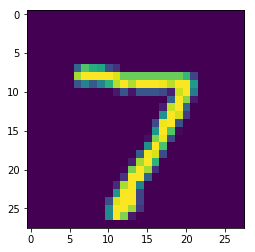

In [34]:
X_test_0 = X_test[0,:].reshape(1,784)
Y_test_0 = Y_test[0,:]
plt.imshow(X_test_0.reshape((28,28)))

In [35]:
pred = model.predict(X_test_0[:])
print('Label of testing sample: ',np.argmax(Y_test_0))
print('Output of the softmax layer', pred[0])
print('Network prediction:', np.argmax(pred[0]))# for the output is a probability distribution

Label of testing sample:  7
Output of the softmax layer [  3.01091816e-15   5.27318085e-11   3.72975428e-09   2.80721849e-07
   1.64274792e-18   1.62960687e-10   1.07897240e-27   9.99999762e-01
   1.16690390e-11   7.00780367e-09]
Network prediction: 7


## 2. CNN networks for classing cats and dogs:
datasets download link: https://www.kaggle.com/c/dogs-vs-cats/data
Create folders as follows:


![](folders.jpg)

In [54]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Input, Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, ZeroPadding2D
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

# dimensions of our images.
img_width, img_height =150, 150

train_data_dir = './data/train/'
validation_data_dir = './data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
nb_epoch = 1 # please change it to about 50 if you have enough time or calculation ability

### Before playing with models, let's have a look at how data augmentation is done with ImageDataGenerator

In [55]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# from PIL import Image
from PIL import *

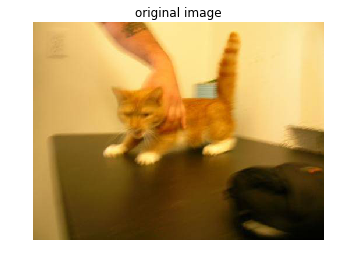

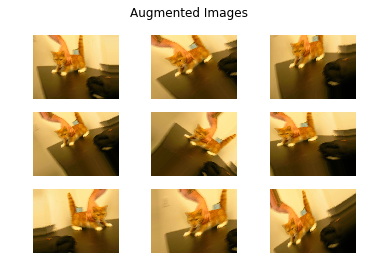

In [56]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
img = load_img('./data/train/cats/cat.0.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('original image')
plt.show()

x = img_to_array(img) # this is a Numpy array with shape ( 150, 150, 3)
x2 = x.reshape((1,)+x.shape) # this is a Numpy array with shape (1, 150, 150, 3)
# the .flow() command below generates batcher of randomly transformed image
# and saves the results to the "\\data_augment" directory
i=0
fig =plt.figure()
fig.suptitle('Augmented Images')
for batch in datagen.flow(x2,batch_size=1,
                          save_to_dir='./data/data_augment',save_prefix='cat',save_format='jpg'):
    i+=1
    if i>9:
        break # otherwise the generator would loop indefinitely
    temp = batch.reshape(x.shape)
    plt.subplot(3,3,i)
    plt.imshow(temp.astype('uint8'))
    plt.axis('off')
plt.show()

### Now we continue with the real data

In [57]:
train_dategen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# This is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_dategen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

validatioin_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 802 images belonging to 2 classes.


### 2.1 Training a custom CNN from scratch

In [58]:
model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(img_width,img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [59]:
model.fit_generator(
        train_generator,
        steps_per_epoch = nb_train_samples,
        epochs=nb_epoch,
        validation_data=validatioin_generator,
        validation_steps =nb_validation_samples)

Epoch 1/1
2000/2000 [==============================] - 356s - loss: 0.4902 - acc: 0.7575 - val_loss: 0.4512 - val_acc: 0.8230


### 2.2 Fine turning using pre-trained VGG16

### 2.2.1 Use pretrained VGG16 as a feature extractor

In [47]:
from keras.applications.vgg16 import VGG16
from keras.layers import Input

input_tensor = Input((img_width, img_height, 3))
model = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)
datagen = ImageDataGenerator(rescale=1./255)

generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width,img_height),
        batch_size=32,
        class_mode=None,
        shuffle=False)

bottleneck_features_train = model.predict_generator(generator,nb_train_samples)
print(bottleneck_features_train.shape)
np.save('bottleneck_features_train.npy', bottleneck_features_train)

generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width,img_height),
        batch_size=32,
        class_mode=None,
        shuffle=False)

bottleneck_features_validation = model.predict_generator(generator,nb_validation_samples)
print(bottleneck_features_validation.shape)
np.save('bottleneck_features_validation.npy', bottleneck_features_validation)

Found 2000 images belonging to 2 classes.
(63504, 4, 4, 512)


In [52]:
train_data = np.load('bottleneck_features_train.npy')
train_labels = np.array([0]*int((nb_train_samples/2))+[1]*int((nb_train_samples/2)))
validation_data = np.load('bottleneck_features_validation.npy')
validation_labels = np.array([0]*int((nb_validation_samples/2))+[1]*int((nb_validation_samples/2)))

TypeError: can't multiply sequence by non-int of type 'float'

In [50]:
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(train_data,train_labels,
          epochs = nb_epoch,
          batch_size=32,
          validation_data=(validation_data,validation_labels))
model.save_weights('top_model_weights.h5')

ValueError: Input arrays should have the same number of samples as target arrays. Found 63504 input samples and 2000 target samples.

### 2.2.2 Use the weights of pretrained VGG16 as initialization

In [44]:
input_tensor = Input((img_width,img_height,3))
model = VGG16(include_top=False, weights='imagenet',input_tensor=input_tensor)

vgg_input = model.input
vgg_output = model.output
top_model = Flatten()(vgg_output)
top_model = Dense(256,activation='relu')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(1,activation='sigmoid')(top_model)

model = Model(vgg_input,top_model)

model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

model.fit_generator(
        train_generator,
        steps_per_epoch = nb_train_samples,
        epochs= nb_epoch,
        validation_data = validation_generator,
        validation_steps = nb_validation_samples)


NameError: name 'Model' is not defined